In [1]:
import modal
from egfr_binder_rd2.utils import hash_seq, load_evolution_metadata
from egfr_binder_rd2 import EGFR, EGFS, OFFICIAL_EGFR
import pandas as pd
from pathlib import Path
from egfr_binder_rd2 import MODAL_VOLUME_PATH, OUTPUT_DIRS
from egfr_binder_rd2.fold import get_a3m_path
pd.set_option('display.max_columns', None)

get_msa = modal.Function.lookup("simplefold", 'get_msa_for_binder')
# a3m_from_template = modal.Function.lookup("simplefold", 'a3m_from_template')
fold_binder = modal.Function.lookup("simplefold", 'fold_binder')
update_metrics = modal.Function.lookup("simplefold", 'update_metrics_for_all_folded')
esm2_pll = modal.Function.lookup("esm2-inference", 'process_sequences')
update_pll_metrics = modal.Function.lookup("esm2-inference", 'update_pll_metrics')
get_exact_plls = modal.Function.lookup("esm2-inference", 'get_exact_plls')
sample_sequences = modal.Function.lookup("bt-training", 'sample_sequences')

In [2]:
binder_seqs = [
    'WVQLQESGGGLVQPGGSLRLSCAASGRTFSSYAMGWFRQAPGKQREFVAAIRWSGGYTYYTDSVKGRFTISRDNAKTTVYLQMNSLKPEDTAVYYCAATYLSSDYSRYALPQRPLDYDYWGQGTQVTVSSLE:LEEKKVCQGTSNKLTQLGTFEDHFLSLQRMFNNCEVVLGNLEITYVQRNYDLSFLKTIQEVAGYVLIALNTVERIPLENLQIIRGNMYYENSYALAVLSNYDANKTGLKELPMRNLQEILHGAVRFSNNPALCNVESIQWRDIVSSDFLSNMSMDFQNHLGSCQKCDPSCPNGSCWGAGEENCQKLTKIICAQQCSGRCRGKSPSDCCHNQCAAGCTGPRESDCLVCRKFRDEATCKDTCPPLMLYNPTTYQMDVNPEGKYSFGATCVKKCPRNYVVTDHGSCVRACGADSYEMEEDGVRKCKKCEGPCRKVCNGIGIGEFKDSLSINATNIKHFKNCTSISGDLHILPVAFRGDSFTHTPPLDPQELDILKTVKEITGFLLIQAWPENRTDLHAFENLEIIRGRTKQHGQFSLAVVSLNITSLGLRSLKEISDGDVIISGNKNLCYANTINWKKLFGTSGQKTKIISNRGENSCKATGQVCHALCSPEGCWGPEPRDCVSCRNVSRGRECVDKCKLLEGEPREFVENSECIQCHPECLPQAMNITCTGRGPDNCIQCAHYIDGPHCVKTCPAGVMGENNTLVWKYADAGHVCHLCHPNCTYGCTGPGLRGCPTNGHHHHHH',
    'QVQLQESGGGLVQPGGSLRLSCAASGRTFSSHAMGWFRQAPGKQREFVAAIRWSGGYTYYTDSVKGRFTISRDNAKTTVYLQMNSLKPEDTAVYYCAATYLSSDYSRYALPQRPLDYDYWGQGTQVTVSSLE:LEEKKVCQGTSNKLTQLGTFEDHFLSLQRMFNNCEVVLGNLEITYVQRNYDLSFLKTIQEVAGYVLIALNTVERIPLENLQIIRGNMYYENSYALAVLSNYDANKTGLKELPMRNLQEILHGAVRFSNNPALCNVESIQWRDIVSSDFLSNMSMDFQNHLGSCQKCDPSCPNGSCWGAGEENCQKLTKIICAQQCSGRCRGKSPSDCCHNQCAAGCTGPRESDCLVCRKFRDEATCKDTCPPLMLYNPTTYQMDVNPEGKYSFGATCVKKCPRNYVVTDHGSCVRACGADSYEMEEDGVRKCKKCEGPCRKVCNGIGIGEFKDSLSINATNIKHFKNCTSISGDLHILPVAFRGDSFTHTPPLDPQELDILKTVKEITGFLLIQAWPENRTDLHAFENLEIIRGRTKQHGQFSLAVVSLNITSLGLRSLKEISDGDVIISGNKNLCYANTINWKKLFGTSGQKTKIISNRGENSCKATGQVCHALCSPEGCWGPEPRDCVSCRNVSRGRECVDKCKLLEGEPREFVENSECIQCHPECLPQAMNITCTGRGPDNCIQCAHYIDGPHCVKTCPAGVMGENNTLVWKYADAGHVCHLCHPNCTYGCTGPGLRGCPTNGHHHHHH',
    'SVDEECPASYEGFCQNDGTCLYLEKLDRYACRCREGYIGERCEFRDLDYWLEQ',
    'DSECPLSHDGYCLHDGVCMYIEALDKYACNCVVGYIGERCQYRDLKWWENLEERLKEHRAKRLALLGPGPPGVVEKEKYKVSITEKVNPGGPATMPMTLTDSNGNKTTLTITVTPEGLEAIRKRRAGEKVKYTMTSTDTGDKFVLVDLDGYCLHDGVCMYIEALDKYACNCVVGYIGERCQYRDLK',
    'DSECPLSHDGYCLHDGVCMYIEALDKYACNCVVGYIGERCQYRDLKWWENLEERLKEHRAKRLALL',
    'NSDSECPLSHDGYCLHDGVCMYIEALDKYACNCVVGYIGERCQYRDLKWWELR',
    'AERMRRRFEHIVEIHEEWAKEVLENLKKQGSKEEDLKFMEEYLEQDVEELRKRAEEMVEEYEKSS',
]


In [9]:
parent_binder_seq = 'PSFSACPSNYDGYCMNGGVCHYFESLTSITCQCIIGYIGDRCQTFDLRYTELRR'
binder_seqs = ['PSFSACPSNYDGYCMNGGVCHYFESLTSITCQCIIGYIGDRCQTFDDRYTELRR']

result = fold_binder.remote(binder_seqs=binder_seqs, parent_binder_seqs=[parent_binder_seq])

In [ ]:

# binder_seqs = ['AERMRRRFEHIVEIHEEWAKEVLENLKKQGSKEEDLKFMEEYLEQDVEELRKRAEEMVEEYEKSS']

# result = get_msa.remote(binder_seqs)


In [9]:
result = esm2_pll.remote()

In [3]:
result = esm2_pll.remote(binder_seqs)

In [10]:
parent_binder_seq = 'SKEEEYYEEHQKLAKPVEELWEKLDELEKTGKLTGEHRPLVTEFRRLWSDAMVLIAMYMWYLEEVDKNPSEENRKKAQEYLEKVEEKKKEMEELLKKL'
parent_binder_seq = 'PSFSACPSNYDGYCMNGGVCHYFESLTSITCQCIIGYIGDRCQTFDLRYTELR'

In [32]:
parent_binder_seq = 'PSFSACPSNYDGVCCNGGVCHLAESLTSYTCQCILGYSGHRVQTFDLRYTELRRR'
parent_binder_seq =         'SYDGYCLNGGVCMHIESLDSYTCNCIGYSGDRCQTRDLRWWELR'
parent_binder_seq =         'SYDGYCLNGCIGYSGDRCQTRDLRWWELR'
parent_binder_seq =         'SYDGYCLNGGVCMHSYTCNCIGYSGDRCQTRDLRWWELRE'

In [ ]:
'SYDGYCLNGGVCMHIESLDSYTCNCVIGYSGDRCQTRDLRWWELRR'

In [2]:
seqs = [
    'SYDGYCLNGCIGYSGDRCQTRDLRWWELR',
    'SYDGYCLNGGVCMHSYTCNCIGYSGDRCQTRDLRWWELRE',
    'SYDGYCLNGGVCMHIESLDSYTCNCVIGYSGDRCQTRDLRWWELRR', 
    'SYDGYCLNGGVCMHIESLDSYTCNCVIGYSGDRCQTRDLRWWELRRR',
    'SYDGYCLNGGVCMHIESLDSYTCNCVIGYSGDRCQTRDLRWWELRRRR',
    'SYDGYCLNGGVCMHIESLDSYTCNCVIGYSGDRCQTRDLRWWELRRRRR',
    'SYDGYCLNGGVCMHIESLDSYTCNCVIGYSGDRCQTRDLRWWELRRRRRR',
    'SYDGYCLNGGVCMHIESLDSYTCNCVIGYSGDRCQTRDLRWWELRRRRRRR',
    'SYDGYCLNGGVCMHIESLDSYTCNCVIGYSGDRCQTRDLRWWELRRRRRRRR',
    'SYDGYCLNGGVCMHIESLDSYTCNCVIGYSGDRCQTRDLRWWELRRRRRRRRR',
    ]

In [28]:
seqs = [
    # 'NLFSNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLLLY',
    'LFSNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLLLY',
    'FSNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLLLY',
    'SNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLLLY',
    'NCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLLLY',
    'CPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLLLY',
    'PRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLLLY',
    'NLFSNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLLL',
    'NLFSNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLL',
    'NLFSNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLL',
    'NLFSNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYL',
    'NLFSNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRY',
    'LFSNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLLL',
    'FSNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLL',
    'SNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLL',
    'NCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYL',
    'CPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRY',
    'PRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIR',
]

In [29]:
result = get_msa.remote(seqs)

In [3]:
get_a3m_path('SYDGYCLNGGVCMHIESLDSYTCNCVIGYSGDRCQTRDLRWWELRR')

PosixPath('/colabfold_data/msa_results/d08924.a3m')

In [4]:
for seq in seqs:
    result = fold_binder.remote(binder_seqs=[seq])


In [41]:
fdf = update_metrics.remote()
df = update_pll_metrics.remote()
fdf = fdf.merge(df, left_on='binder_sequence', right_on='sequence', how='left')
fdf['pae_interaction_rank'] = 1 - fdf['pae_interaction'].rank(pct=True)
fdf['i_ptm_rank'] = fdf['i_ptm'].rank(pct=True)
fdf['sequence_log_pll_rank'] = fdf['sequence_log_pll'].rank(pct=True)
fdf['fitness'] = (fdf['pae_interaction_rank'] + fdf['i_ptm_rank'] + fdf['sequence_log_pll_rank']) / 3
fdf = fdf.sort_values('fitness', ascending=False).reset_index(drop=True)
cols = [
    'seq_hash', 'binder_length', 'fitness', 'pae_interaction', 'i_ptm',  'sequence_log_pll',
      
       'pae_interaction_rank', 'i_ptm_rank',
       'sequence_log_pll_rank',
       'binder_plddt', 'binder_hydropathy','binder_pae',
        'ptm', 'binder_charged_fraction',
       'binder_hydrophobic_fraction',
       'binder_sequence',
]
results = fdf[cols].round(3)

In [44]:
results.query('binder_length < 50')

,seq_hash,binder_length,fitness,pae_interaction,i_ptm,sequence_log_pll,pae_interaction_rank,i_ptm_rank,sequence_log_pll_rank,binder_plddt,binder_hydropathy,binder_pae,ptm,binder_charged_fraction,binder_hydrophobic_fraction,binder_sequence
512,f5effd,45,0.859,8.020,0.94,-107.506,0.789,0.848,0.939,89.567,0.397,3.693,0.86,0.289,0.267,SYEGYCENRGTCQHIESLDSYTCKCLKGYTGDRCQSQDLRYLYLE
539,72da1a,45,0.854,7.964,0.94,-116.637,0.819,0.848,0.894,89.974,0.379,3.665,0.86,0.311,0.244,SYDGYCNNHGVCRHIESLDSWTCQCRQGYEGDRCQTRDLRWLELN
540,27d533,45,0.854,8.012,0.94,-113.166,0.794,0.848,0.919,89.875,0.384,3.716,0.86,0.289,0.244,SYNGYCKNGGQCQHIISLDQYTCRCESGYEGDRCQTRDLRWLELR
614,446a03,44,0.837,7.458,0.95,-202.558,0.988,0.967,0.557,93.206,0.386,2.647,0.86,0.227,0.227,CPRRYNGICTNNGRCQYARNLRTYTCQCLPGYTKPRCQELDIRY
630,2c86e8,44,0.834,7.734,0.93,-102.701,0.919,0.639,0.943,91.938,0.418,2.808,0.85,0.182,0.250,CPRRYRGICNNNGSCQYAINLRTYTCQCLPGYTGPRCQELDIRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5202,61a6b2,29,0.125,21.155,0.44,-328.075,0.092,0.089,0.195,30.810,0.391,10.684,0.68,0.310,0.276,SMIGYCLNGHIGYSGRRCQTRDPRWHELR
5255,682898,29,0.119,20.739,0.47,-361.513,0.098,0.096,0.161,31.667,0.397,10.921,0.67,0.310,0.310,SMRLYCLNGHIGYSGRRCQTRDLRWHELQ
5269,e0066d,29,0.117,23.371,0.38,-306.442,0.046,0.072,0.232,24.257,0.328,12.679,0.65,0.310,0.207,SMKHTCLNGHPGYSGTDCQTRDYRWWEQR
5346,b6151d,40,0.107,21.681,0.47,-386.690,0.083,0.096,0.142,29.653,0.413,14.315,0.66,0.275,0.325,SYDGYCLNGHVCMHSYTENHIGYSPDRAQTIDLGWYELRE


In [6]:
results.query('binder_length == 45').head(20)

,seq_hash,binder_length,fitness,pae_interaction,i_ptm,sequence_log_pll,pae_interaction_rank,i_ptm_rank,sequence_log_pll_rank,binder_plddt,binder_hydropathy,binder_pae,ptm,binder_charged_fraction,binder_hydrophobic_fraction,binder_sequence
496,f5effd,45,0.841,8.020,0.94,-107.506,0.773,0.825,0.923,89.567,0.397,3.693,0.86,0.289,0.267,SYEGYCENRGTCQHIESLDSYTCKCLKGYTGDRCQSQDLRYLYLE
514,27d533,45,0.834,8.012,0.94,-113.166,0.778,0.825,0.899,89.875,0.384,3.716,0.86,0.289,0.244,SYNGYCKNGGQCQHIISLDQYTCRCESGYEGDRCQTRDLRWLELR
522,72da1a,45,0.833,7.964,0.94,-116.637,0.806,0.825,0.867,89.974,0.379,3.665,0.86,0.311,0.244,SYDGYCNNHGVCRHIESLDSWTCQCRQGYEGDRCQTRDLRWLELN
611,fe7b4c,45,0.806,8.156,0.94,-112.133,0.688,0.825,0.905,89.269,0.414,3.865,0.85,0.289,0.244,SYDGKCCNNGACRYISRLDSYTCECVSGYTGDRCQTRDLRWLELR
640,569df9,45,0.799,8.030,0.94,-139.359,0.768,0.825,0.805,90.056,0.383,3.614,0.85,0.333,0.244,SYDGKCLNNGKCRYIEDLDSYTCQCESGYTGDRCQTRDLRWLELH
664,632ea6,45,0.792,8.071,0.94,-140.281,0.747,0.825,0.804,89.731,0.390,3.689,0.85,0.311,0.244,SYDGYCLNRGECQHIHSLDSYTCKCEPGYTGDRCQTQDLRWLELR
667,942bea,45,0.792,7.990,0.94,-148.023,0.794,0.825,0.755,89.933,0.377,3.540,0.86,0.356,0.244,SYDGYCNNRGVCRHIESLDSYTCKCDQGYEGDRCQTRDLRWLELH
712,a43235,45,0.779,8.104,0.94,-144.003,0.724,0.825,0.789,89.382,0.379,3.819,0.86,0.333,0.244,KYDGYCNNHGECQHIHSLDSYTCKCLPGYEGDRCQTQDLRWLELR
740,f85c28,45,0.771,8.098,0.93,-75.410,0.730,0.593,0.990,89.350,0.390,3.797,0.85,0.311,0.267,SYDGYCLNNGRCQHIESLDKYTCLCEPGYRGDRCQTRDLRYLELQ
772,7b2ed8,45,0.761,8.104,0.94,-150.474,0.725,0.825,0.732,89.341,0.382,3.774,0.86,0.333,0.267,SYDGYCNNRGVCRHIESLDTYTCQCKQGYEGDRCETRDLRWLELY


In [ ]:
SYDGYCNNHEVCRHEESLDSWTCQCRQGYEGDRCQTRDLRWLELN

In [32]:
top_guys =results.head(100)['binder_sequence'].to_list()
top_guys

['NLFSNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLLLY',
 'NLFSNCPRRYRGICENNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLLLY',
 'SLFSRCPKRYHGICNNNGQCRYAINLRTYTCICKSGYTGDRCQELDIRYLLLLN',
 'SLFSRCPRRYHGICGNNGQCRYAINLRTYTCRCVSGYTGDRCQELDIRYLLLLN',
 'GLFSRCPKRYHGICGNNGQCRYAINLRTYTCRCVSGYTGPRCQELDIRYLLLLN',
 'NLFSNCPRRYRGICNNNGSCQYAINLRTYTCQCSSGYTGARCQELDIRYLLLLY',
 'NLFSNCPRRYRGICTNNGSCQYAINLRTYTCQCSSGYTGARCQELDIRYLLLLY',
 'NLFSRCPKRYHGICENNGQCRYAINLRTYTCICDSGYTGDRCQELDIRYLLLLN',
 'SLFSRCPRRYHGICHNNGQCRYAINLRTYTCRCVSGYTGDRCQEKDIRYLLLLY',
 'NLFSICPRRYRGICTNNGSCRYAINLRTYTCQCVSGYTGARCQELDIRYLLLLY',
 'SLFSRCPKRYHGICNNNGQCRYAINLRTYTCICVSGYTGDRCQELDIRYLLLLN',
 'GLFSRCPKRYHGICGNNGQCRYAINLRTYTCRCVSGYTGDRCQELDIRYLLLLN',
 'SLFSRCPYRYHGICNNNGQCRYAINLRTYTCICVSGYTGDRCQELDIRYLLLLN',
 'ELFSRCPKRYHGICGNNGQCRYAINLRTYTCRCVSGYTGDRCQELDIRYLLLLN',
 'NLFSRCPKRYHGICGNNGQCRYAIHLRTGTCRCVSGYTGRRCQELDIRYLLLLY',
 'SLFSRCPRRYYGICGNNGLCKYAINLRTGTCRCVSGYTGDRCQELDIRYLLLLN',
 'NLFSKCPRRYYGICGNNGRCKYAINLRTYTCRCVSGYTGQRCQEKDIRYLLLLN

In [78]:
len('SYDGYCLNGGVCMHIESLDSYTCNCVIGYSGDRCQTRDLRWWELR')

45

In [27]:
results.query('binder_length == 65').sort_values('i_ptm', ascending=False).head(20).iloc[2]['binder_sequence']

'AERMRRRFESIVEIHEEWAKEVLENLKKQGSKEEDLKFMEEYLEQDVEELRKRAEEMVEEYEKSS'

In [33]:
def add_to_fasta(binder_seq, target_seq:str=OFFICIAL_EGFR, fasta_path:str='/home/naka/code/egfr_binder_rd2/data/fastas/rd2.fasta'):
    # Generate the full sequence and hash
    full_seq = f"{binder_seq}:{target_seq}"
    name = hash_seq(full_seq)
    
    # Read existing sequences if file exists
    existing_sequences = set()
    try:
        with open(fasta_path, 'r') as f:
            for line in f:
                if line.startswith('>'):
                    continue
                existing_sequences.add(line.strip())
    except FileNotFoundError:
        pass
    
    # Only append if sequence is new
    if full_seq not in existing_sequences:
        with open(fasta_path, 'a') as f:
            f.write(f'\n>{name}\n{full_seq}\n')


In [34]:
for s in top_guys:
    add_to_fasta(s) 


In [35]:
import os
import json
import numpy as np

def get_metrics(
    output_folder, sequence_name, target_length=621
):  # the EGFR sequence has 621 residues
    files = os.listdir(output_folder)
    pae_file = f"{sequence_name}_predicted_aligned_error_v1.json"
    with open(os.path.join(output_folder, pae_file), "r") as f:
        pae = np.array(json.load(f)["predicted_aligned_error"])
    binder_len = (
        len(pae) - target_length
    )  # note that we are assuming that the binder always comes first in the sequence!
    pae_interaction = (
        pae[:binder_len, binder_len:].mean() + pae[binder_len:, :binder_len].mean()
    ) / 2
    scores = None
    for file in files:
        if file.startswith(f"{sequence_name}_scores_rank_001"):
            with open(os.path.join(output_folder, file), "r") as f:
                scores = json.load(f)
            break
    if scores is None:
        raise ValueError("No scores file found")
    iptm = scores["iptm"]
    return iptm, pae_interaction

In [36]:
from biotite.sequence.io.fasta import FastaFile

In [37]:
file = FastaFile().read('/home/naka/code/egfr_binder_rd2/data/fastas/rd2.fasta')

In [51]:
output_folder = '/home/naka/code/egfr_binder_rd2/data/colabfold_outputs/high_quality_folded'
hq_results = []
for header, sequence in file.items():
    try:
        iptm, pae_interaction = get_metrics(output_folder, header)
        hq_results.append({
            'seq_hash': header, 
            'iptm': iptm, 
            'pae_interaction': pae_interaction,
            'sequence': sequence
        })
    except:
        continue

    
hq_results = pd.DataFrame(hq_results)
# hq_results.to_csv('/home/naka/code/egfr_binder_rd2/data/hq_results.csv', index=False)

In [ ]:
hq_results.sort_values(['iptm', 'pae_interaction'], ascending=[False, True]).head(40)

In [ ]:
exact_plls = update_pll_metrics.remote()

In [3]:
metrics_csv_path = '/home/naka/code/egfr_binder_rd2/metrics.csv'

# Read existing metrics if file exists and not overwriting
existing_metrics = {}
df = pd.read_csv(metrics_csv_path)
existing_metrics = {row['seq_hash']: row for _, row in df.iterrows()}


In [ ]:
evoprotgrad_df = sample_sequences.remote(
    sequences=['SLFSICPYRYHGICKNNGVCRYAINLRSYTCQCVSGYTGARCQEADIRYLLLRI'],  # Pass all parent sequences at once
    # expert_configs=expert_configs,
    n_parallel_chains=16,
    n_serial_chains=1,
    n_steps=50,
    max_mutations=10,
    seed=42,
    run_inference=True,
)

# pll

In [12]:
import torch
import math

In [55]:
from transformers import AutoModelForMaskedLM, AutoTokenizer
from tqdm import tqdm


In [ ]:

model = AutoModelForMaskedLM.from_pretrained("facebook/esm2_t33_650M_UR50D").cuda()
tokenizer = AutoTokenizer.from_pretrained("facebook/esm2_t33_650M_UR50D")

In [52]:
batch_size = 1
# sequences = ['NLFSNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLLLY']
sequences = hq_results['sequence'].to_list()

In [59]:
all_results = []
model.eval();
for i in tqdm(range(0, len(sequences), batch_size)):
    batch_sequences = sequences[i:i+batch_size]
    
    for sequence in tqdm(batch_sequences):
        log_probs = []
        tokens = tokenizer(sequence, return_tensors="pt").to("cuda")
        input_ids = tokens["input_ids"].clone()
        attention_mask = tokens["attention_mask"].clone()
        seq_length = len(sequence)
        
        # For each position in sequence
        for pos in range(seq_length):
            # Clone tokens and mask current position
            correct_token_id = input_ids[0, pos + 1].clone()
            masked_input_ids = input_ids.clone()
            masked_input_ids[0, pos + 1] = tokenizer.mask_token_id
            
            with torch.no_grad():
                logits = model(masked_input_ids, attention_mask=attention_mask).logits
                token_probs = torch.log_softmax(logits, dim=-1)
                
            # Get probability of correct token at masked position
            log_prob = token_probs[0, pos + 1, correct_token_id].item()
            log_probs.append(log_prob)
        
        result = {
            "sequence": sequence,
            "token_log_plls": log_probs,
            "sequence_log_pll": math.fsum(log_probs),
            "normalized_log_pll": math.fsum(log_probs) / seq_length,
            "sequence_length": seq_length
        }
        all_results.append(result)

all_results = pd.DataFrame(all_results)

  1%|          | 1/84 [00:41<56:51, 41.11s/it]


KeyboardInterrupt: 

In [20]:

hq_results.merge(all_results, left_on='sequence', right_on='sequence', how='left')

['NLFSNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLLLY',
 'NLFSNCPRRYRGICENNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLLLY',
 'SLFSRCPKRYHGICNNNGQCRYAINLRTYTCICKSGYTGDRCQELDIRYLLLLN',
 'SLFSRCPRRYHGICGNNGQCRYAINLRTYTCRCVSGYTGDRCQELDIRYLLLLN',
 'NLFSNCPRRYRGICNNNGSCQYAINLRTYTCQCSSGYTGARCQELDIRYLLLLY',
 'GLFSRCPKRYHGICGNNGQCRYAINLRTYTCRCVSGYTGPRCQELDIRYLLLLN',
 'NLFSNCPRRYRGICTNNGSCQYAINLRTYTCQCSSGYTGARCQELDIRYLLLLY',
 'NLFSRCPKRYHGICENNGQCRYAINLRTYTCICDSGYTGDRCQELDIRYLLLLN',
 'SLFSRCPRRYHGICHNNGQCRYAINLRTYTCRCVSGYTGDRCQEKDIRYLLLLY',
 'NLFSICPRRYRGICTNNGSCRYAINLRTYTCQCVSGYTGARCQELDIRYLLLLY']

In [ ]:
sequences = [
    # 'NLFSNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLLLY',
    'LFSNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLLLY',
    'FSNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLLLY',
    'SNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLLLY',
    'NCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLLLY',
    'CPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLLLY',
    'PRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLLLY',
    'NLFSNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLLL',
    'NLFSNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLL',
    'NLFSNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLL',
    'NLFSNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYL',
    'NLFSNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRY',
    'LFSNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLLL',
    'FSNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLL',
    'SNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLL',
    'NCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYL',
    'CPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRY',
    'PRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIR',
]

In [24]:
result

{'sequence': 'NLFSNCPRRYRGICTNNGSCQYAINLRTYTCQCLSGYTGARCQELDIRYLLLLY',
 'token_log_plls': [-3.769948959350586,
  -2.32918381690979,
  -2.469907760620117,
  -2.21805477142334,
  -2.400697708129883,
  -0.02994653396308422,
  -0.5939770340919495,
  -3.610626697540283,
  -2.653019428253174,
  -1.190549612045288,
  -2.080343723297119,
  -2.554677963256836,
  -4.085910797119141,
  -0.006255451589822769,
  -4.615664482116699,
  -0.39618930220603943,
  -2.8934097290039062,
  -0.16174402832984924,
  -3.1724088191986084,
  -0.018980076536536217,
  -3.584406852722168,
  -2.075016975402832,
  -4.483704566955566,
  -3.2676239013671875,
  -2.5897903442382812,
  -1.9676469564437866,
  -2.8732242584228516,
  -2.551882266998291,
  -2.5723507404327393,
  -2.2658205032348633,
  -0.0016969341086223722,
  -2.5627284049987793,
  -0.0036083844024688005,
  -2.7324185371398926,
  -2.439979076385498,
  -0.33887991309165955,
  -0.5943247675895691,
  -1.4149036407470703,
  -0.016846880316734314,
  -3.627836227416

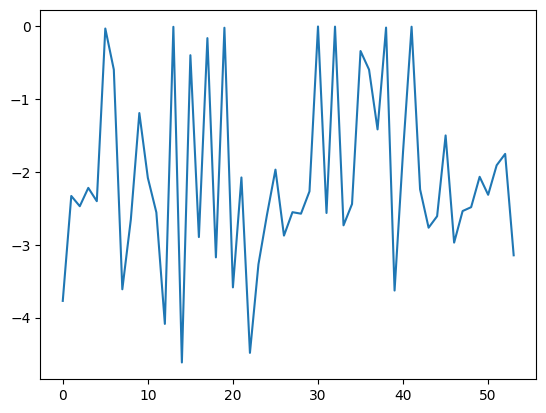

In [25]:
from matplotlib import pyplot as plt
plt.plot(result['token_log_plls'])